In [64]:
library(Seurat)
library(dplyr)
library(ggplot2)
seed <- 242

In [3]:
#hires image
hires <- Read10X_Image("../spatial/",image.name = 'tissue_hires_image.png')
hires

Spatial coordinates for 545913 cells
Default segmentation boundary: centroids 
Associated assay: Spatial 
Key: slice1_ 

In [65]:
p2 <- Load10X_Spatial(data.dir = "../", image = hires)
p2

An object of class Seurat 
18085 features across 545913 samples within 1 assay 
Active assay: Spatial (18085 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: slice1

In [66]:
# update the lowres to make it conistent with plotting function
p2@images$slice1@scale.factors$lowres <- hires@scale.factors$hires


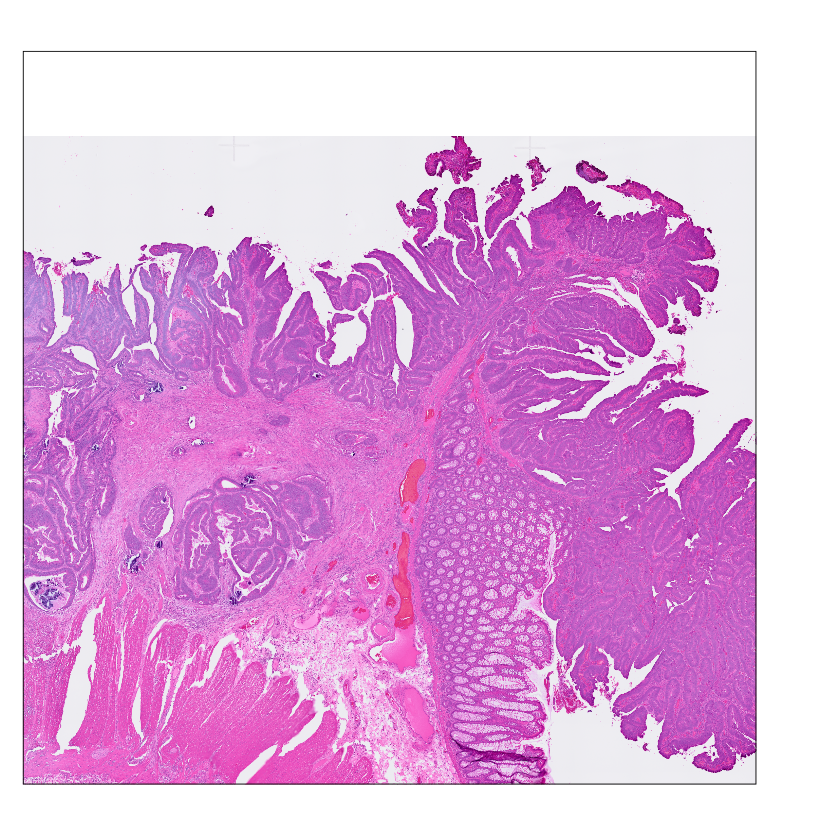

In [8]:
SpatialDimPlot(p2, alpha = 0) + theme(legend.title = element_blank(), 
                                      legend.text = element_blank(),
                                     panel.border = element_rect(fill = 'transparent'))

In [9]:
dir.create("./Figures")

In [10]:
ggsave("./Figures/Colorectal_cancer_P2_visium_hd.png", dpi = 300)

Saving 7 x 7 in image


In [15]:
# basic qc filters
p2 <- p2[names(which(rowSums(GetAssayData(p2, layer = 'counts')) > 100)), names(which(colSums(GetAssayData(p2, layer = 'counts'))>50))]
p2

# follow legacy seurat tutorial for other qc metrics

Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


An object of class Seurat 
15385 features across 473219 samples within 1 assay 
Active assay: Spatial (15385 features, 0 variable features)
 1 layer present: counts
 1 spatial field of view present: slice1

In [67]:
# normalize data
p2 <- NormalizeData(p2)
# find variable features
p2 <- FindVariableFeatures(p2, nfeatures = 2000, selection.method = 'vst')

Normalizing layer: counts

Finding variable features for layer counts



In [17]:
p2 <- ScaleData(p2)

Centering and scaling data matrix



In [18]:
p2 <- RunPCA(p2, reduction.name = 'pca')

PC_ 1 
Positive:  COL3A1, VIM, COL1A1, COL1A2, SPARC, TAGLN, MMP2, COL6A2, IGFBP7, LGALS1 
	   LUM, COL5A1, COL6A3, CALD1, DCN, AEBP1, C1S, VCAN, TIMP2, COL4A1 
	   COL6A1, A2M, C1R, MYL9, IGKC, ACTA2, THBS2, FSTL1, THY1, MGP 
Negative:  PHGR1, NQO1, FABP1, EREG, GPX2, LCN2, MCM4, TSPAN8, PTP4A3, GPCPD1 
	   SELENBP1, LRATD1, FERMT1, FASN, TRIM31, HIST1H1B, AREG, KRT23, MUC13, CXCL2 
	   DHCR24, CXCL3, S100P, FAM83H, HIST1H1C, VEGFA, NCOA7, MYBL2, ID1, TUBA1C 
PC_ 2 
Positive:  MMP12, HIST1H1B, HIST1H1C, PTP4A3, VIM, IFI30, COL4A1, COL1A1, MCM4, NCOA7 
	   CTSB, PLAU, SPARC, CD74, MYBL2, F3, TIMP1, COL1A2, LGALS1, ARHGDIB 
	   CXCL14, EREG, COL5A1, COL3A1, IGFBP7, SOD2, APCDD1, WARS, NQO1, SRGN 
Negative:  PIGR, FCGBP, MUC2, CLCA1, CA2, TFF3, SPINK4, PLA2G2A, ZG16, TSPAN1 
	   AGR2, OLFM4, KRT20, MUC4, REG4, SLC26A3, ITLN1, B3GALT5, DUOX2, GUCA2A 
	   CA4, AGR3, TSPAN8, CDHR5, CCL28, CA1, PARM1, PADI2, NXPE1, ATP8B1 
PC_ 3 
Positive:  TAGLN, SFRP4, DES, THBS2, MYL9, ACTG2, MYH11, FN1, 

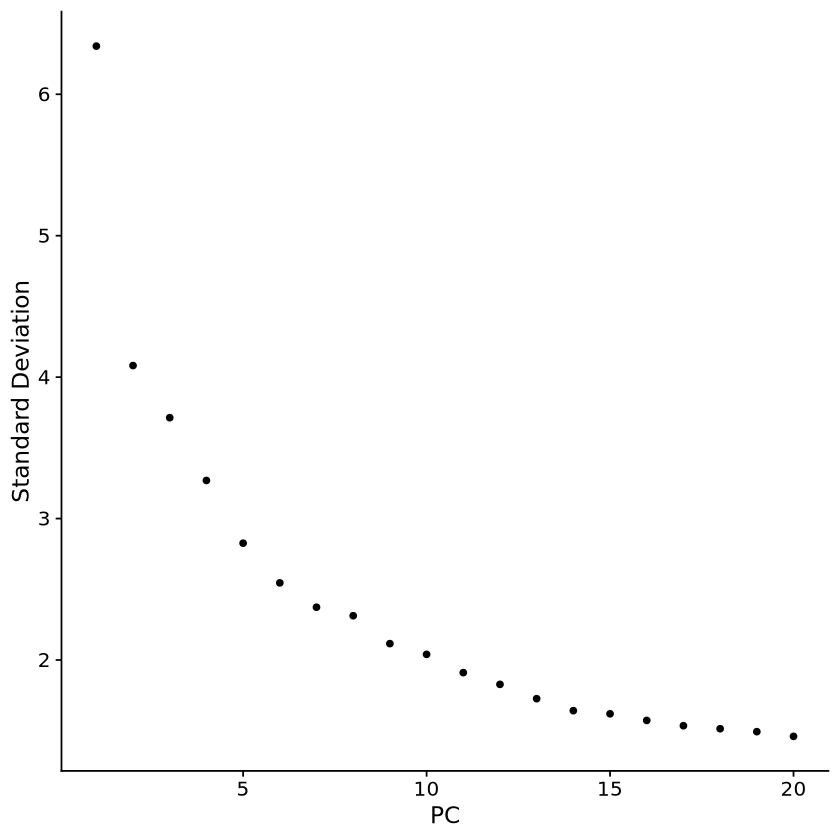

In [20]:
ElbowPlot(p2, reduction = 'pca')

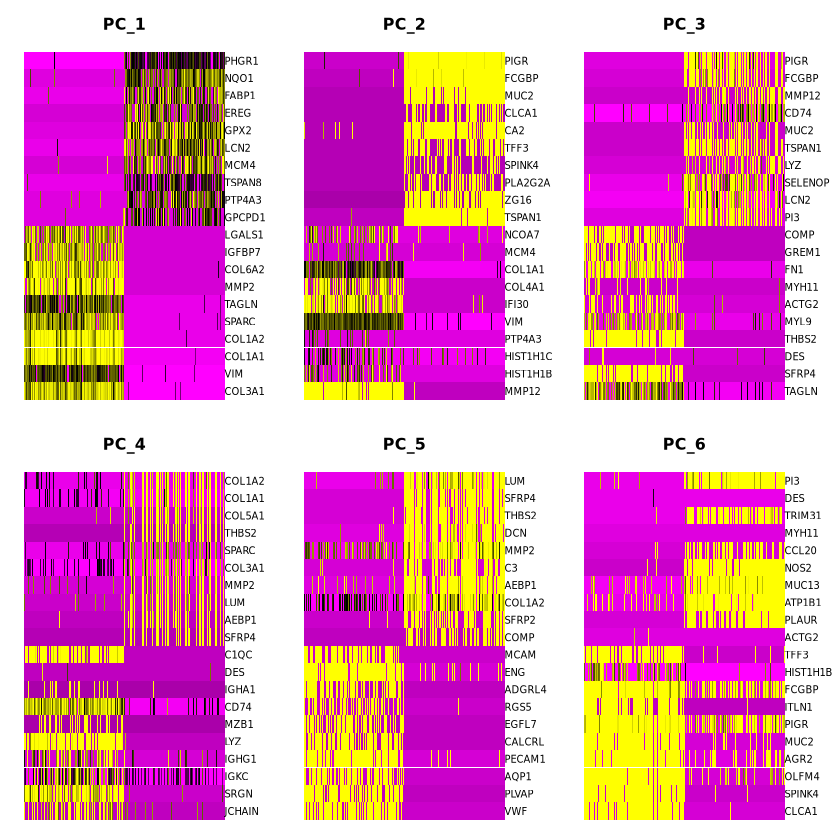

In [34]:
# pc1 captures majority of variance
p1 <- DimHeatmap(p2, dims = 1:6, nfeatures = 20, balanced = TRUE, cells = 500)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


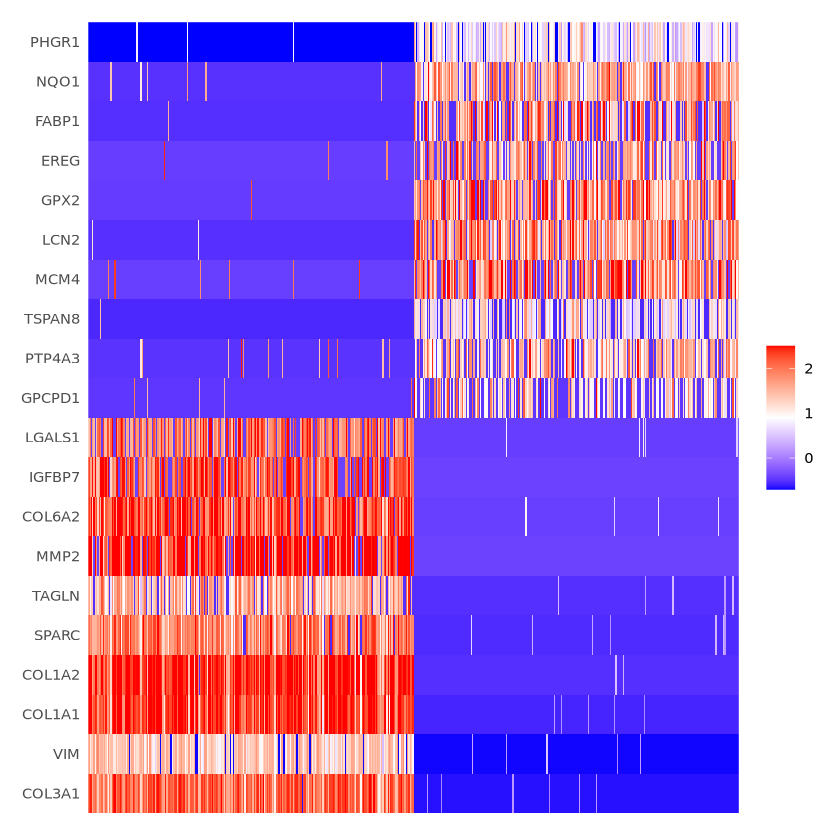

In [42]:
p1 <- DimHeatmap(p2, dims = 1, nfeatures = 20, balanced = TRUE, cells = 500, fast = FALSE)
p1 + scale_fill_gradientn(colors = c("blue", "white", "red"))


In [46]:
# finding neighbors
p2 <- FindNeighbors(p2, dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [47]:
p2 <- FindClusters(p2, algorithm = 1, cluster.name = 'louvian_0.1', res = 0.1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 473219
Number of edges: 11885639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9580
Number of communities: 6
Elapsed time: 356 seconds


1 singletons identified. 5 final clusters.



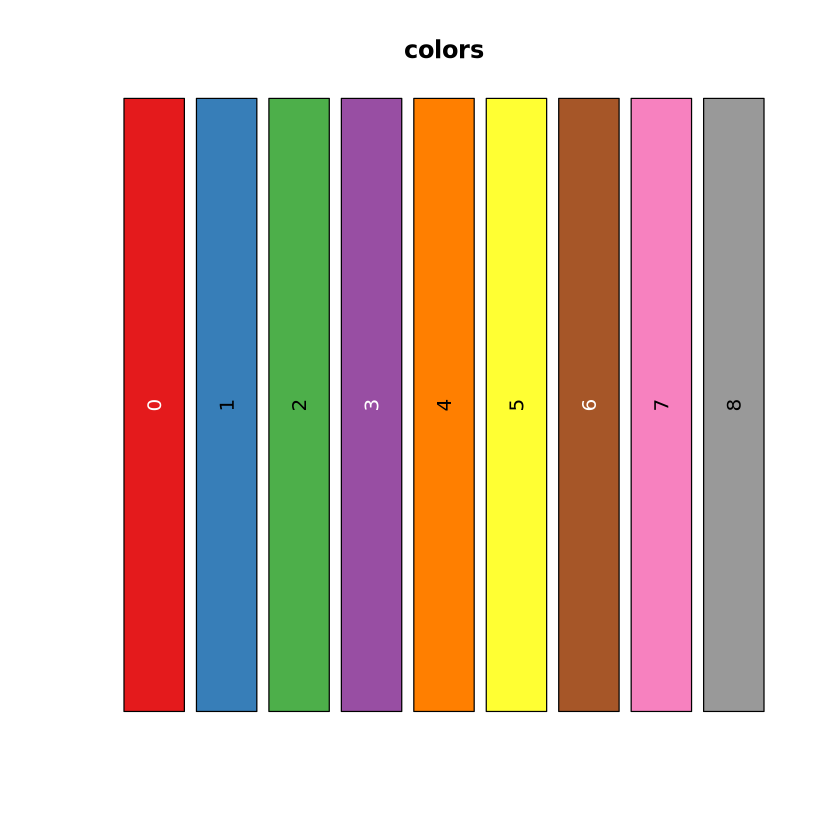

In [49]:
library(Polychrome)
library(RColorBrewer)
colors <- brewer.pal(9, 'Set1')
colors <- setNames(colors, nm = seq(from=0, to = 8))
swatch(colors)

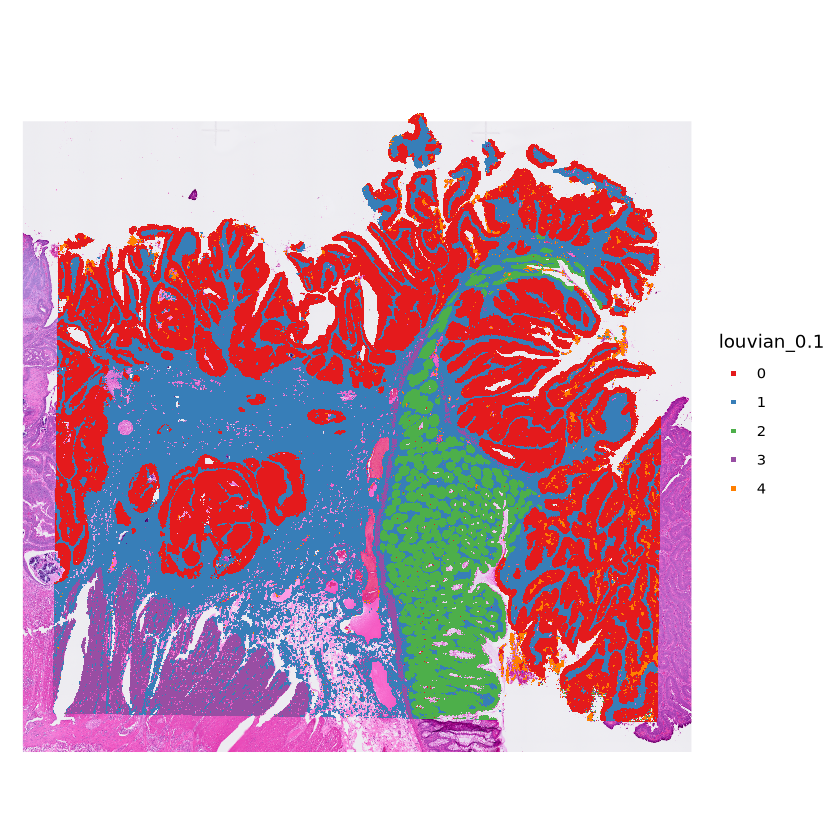

In [57]:
SpatialDimPlot(p2, group.by = 'louvian_0.1', cols = colors, pt.size.factor = 5, shape = 22)

In [58]:
ggsave("./Figures/Colorectal_cancer_P2_visium_hd_clusters.png", dpi = 300)

Saving 7 x 7 in image


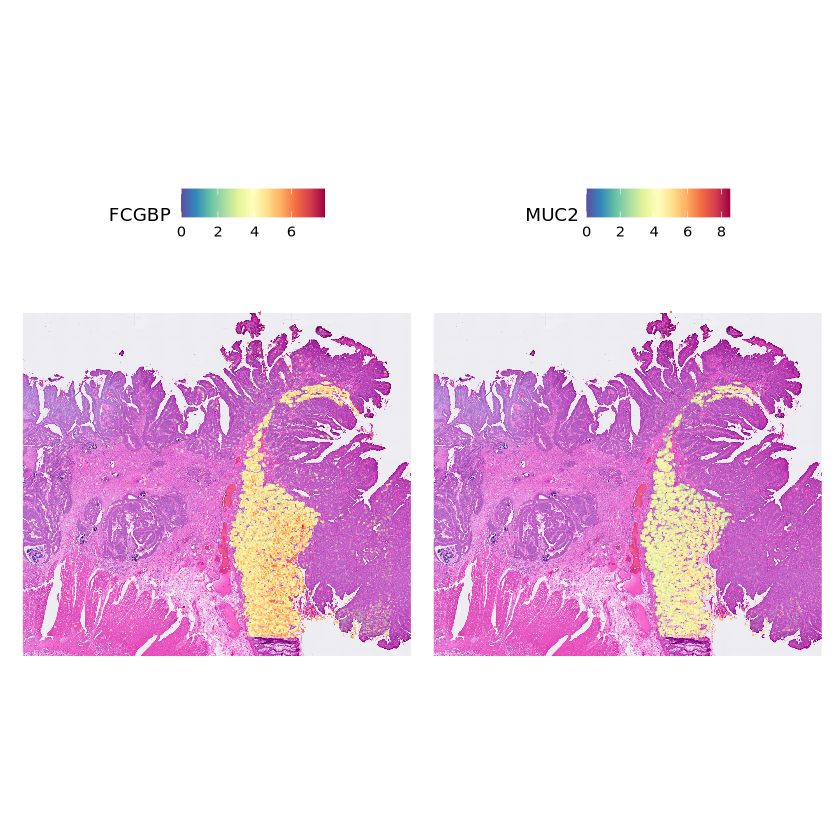

In [72]:
p1 <- SpatialFeaturePlot(p2, features = "FCGBP", pt.size.factor = 15, shape = 22, alpha = c(0, 1))
p3 <- SpatialFeaturePlot(p2, features = "MUC2", pt.size.factor = 15, shape = 22, alpha = c(0,1))
p1 | p3

In [73]:
ggsave("./Figures/Normal_colon_markers_coexpressed.png", dpi = 300)

Saving 7 x 7 in image


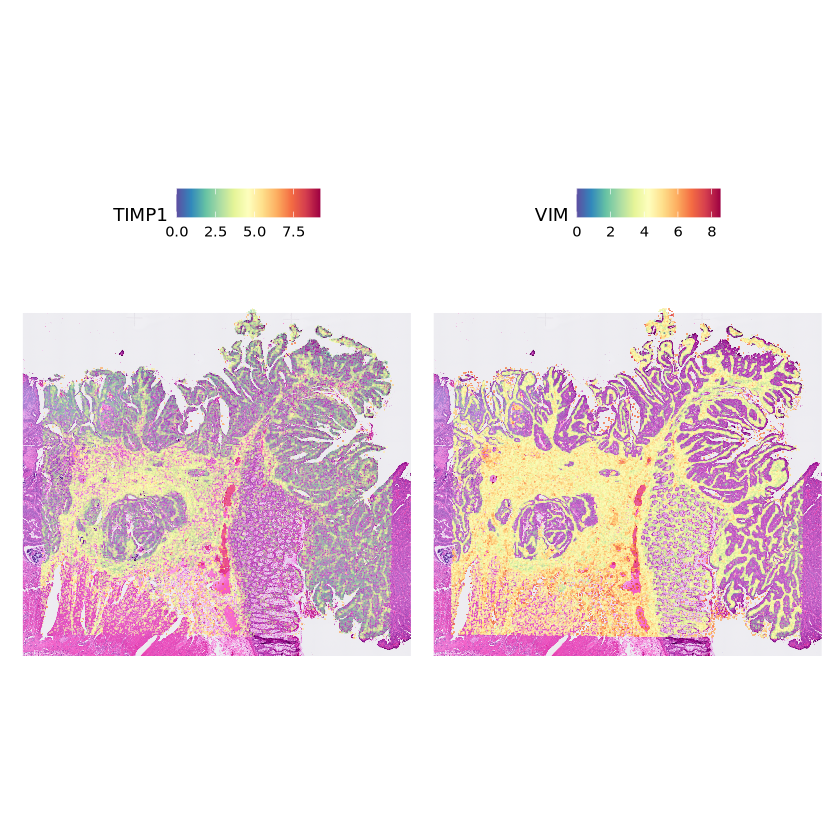

In [74]:
p1 <- SpatialFeaturePlot(p2, features = "TIMP1", pt.size.factor = 15, shape = 22, alpha = c(0, 1))
p3 <- SpatialFeaturePlot(p2, features = "VIM", pt.size.factor = 15, shape = 22, alpha = c(0,1))
p1 | p3

In [75]:
ggsave("./Figures/Normal_colon_markers_down_expressed.png", dpi = 300)

Saving 7 x 7 in image
